# Import das bibliotecas 

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import models
from keras.utils import to_categorical

Using TensorFlow backend.


# Carregamento das Imagens

In [2]:
mnist = keras.datasets.mnist


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((len(train_images), 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((len(test_images), 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
train_images[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Visualização da imagem

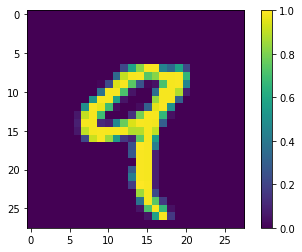

In [5]:
plt.figure()
plt.imshow(train_images[4].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

# Definição da topologia da Rede neural

In [6]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilação do modelo

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo

In [8]:
model.fit(train_images, train_labels, epochs=5,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 17s 404us/sample - loss: 0.1655 - accuracy: 0.9485 - val_loss: 0.0719 - val_accuracy: 0.9776
Epoch 2/5
42000/42000 [==============================] - 17s 405us/sample - loss: 0.0500 - accuracy: 0.9851 - val_loss: 0.0567 - val_accuracy: 0.9834
Epoch 3/5
42000/42000 [==============================] - 16s 391us/sample - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 4/5
42000/42000 [==============================] - 17s 395us/sample - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0458 - val_accuracy: 0.9878
Epoch 5/5
42000/42000 [==============================] - 17s 393us/sample - loss: 0.0203 - accuracy: 0.9941 - val_loss: 0.0434 - val_accuracy: 0.9887


# Avaliar exatidão do modelo

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 93us/sample - loss: 0.0353 - accuracy: 0.9908
Test accuracy: 0.9908


In [10]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
predictions = model.predict(test_images)

In [12]:
test_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [13]:
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

In [14]:
y_true = [np.argmax(test_labels[i]) for i in range(len(test_labels))]

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_true,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Predict

In [16]:
predictions = model.predict(test_images)

In [17]:
np.argmax(predictions[200])

3

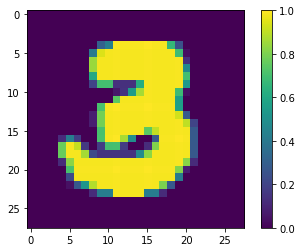

In [19]:
plt.figure()
plt.imshow(test_images[200].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

## Training model with all samples

In [20]:
dataset = np.concatenate((train_images,test_images), axis=0)

In [21]:
labels = np.concatenate((train_labels, test_labels), axis=0)

## Create Model

In [23]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(dataset, labels, epochs=5,validation_split=0.05)

Train on 66500 samples, validate on 3500 samples
Epoch 1/5
66500/66500 [==============================] - 24s 366us/sample - loss: 0.1287 - accuracy: 0.9600 - val_loss: 0.0255 - val_accuracy: 0.9917
Epoch 2/5
66500/66500 [==============================] - 24s 363us/sample - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0152 - val_accuracy: 0.9949
Epoch 3/5
66500/66500 [==============================] - 27s 400us/sample - loss: 0.0309 - accuracy: 0.9909 - val_loss: 0.0183 - val_accuracy: 0.9940
Epoch 4/5
66500/66500 [==============================] - 27s 405us/sample - loss: 0.0244 - accuracy: 0.9928 - val_loss: 0.0131 - val_accuracy: 0.9957
Epoch 5/5
66500/66500 [==============================] - 26s 395us/sample - loss: 0.0201 - accuracy: 0.9943 - val_loss: 0.0141 - val_accuracy: 0.9957


## Save model

In [26]:
model.save("model.h5")

## Load model

In [27]:
loaded_model = tf.keras.models.load_model("model.h5")

## Load image sample

In [28]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('imageToSave.png', cv2.IMREAD_UNCHANGED)
img_gray = img[:, :, 3]

## plot image 

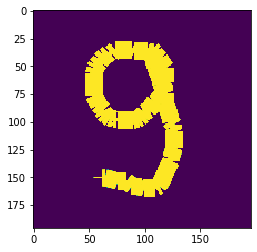

In [29]:
plt.imshow(img_gray)

## resize image sample

In [36]:
resized = cv2.resize(img_gray,(28, 28), interpolation = cv2.INTER_AREA)

In [37]:
resized =resized/255

In [38]:
resized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## plot after resize image sample

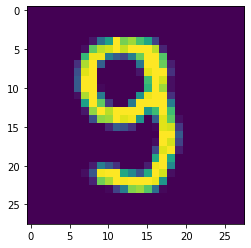

In [39]:
plt.imshow(resized)

In [40]:
np.argmax(loaded_model.predict(np.array([resized.reshape(28,28,1)])))

9